In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [2]:
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
warnings.filterwarnings('ignore', '^internal gelsd')
np.random.seed(42)

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
x_train_full.shape

(60000, 28, 28)

In [6]:
x_train_full.dtype

dtype('uint8')

In [7]:
# Valid = 유효한
x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test / 255.0

In [8]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
class_names[y_train[0]]

'Coat'

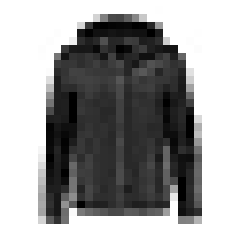

In [10]:
plt.imshow(x_train[0], cmap="binary")
plt.axis('off')
plt.show()

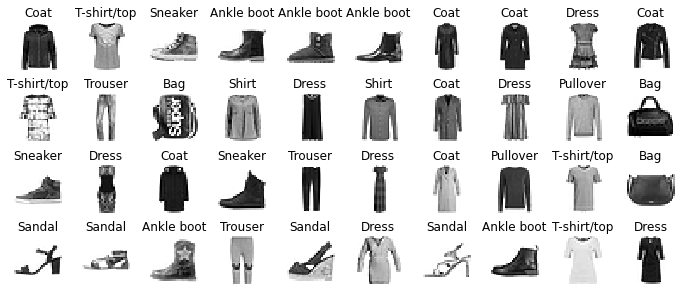

In [11]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 스퀸셜 API를 사용하여 모델 만들기

In [12]:
# # Dence = 밀집한, Flatten = 납작해지다
# # 모델 생성
# model = keras.models.Sequential()
# # 1D 배열로 변환한다. X 데이터를 받으면 reshape(-1, 1) 
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# # 300개의 히든레이아웃 생성
# model.add(keras.layers.Dense(300, activation='relu'))
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))

In [13]:
keras.backend.clear_session()

In [14]:
# 리스트로 한번에 제작이 가능하다.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [15]:
model.layers

In [16]:
# 모든 층을 출력함
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [18]:
model.get_layer('dense') is hidden1

True

In [19]:
weights, biases = hidden1.get_weights()

In [20]:
weights

array([[-0.0579972 ,  0.05876423,  0.03236631, ..., -0.0021202 ,
         0.00384509, -0.00636692],
       [ 0.04193138, -0.06691332, -0.03919753, ...,  0.01761878,
         0.02740476,  0.00220659],
       [-0.04087559, -0.00146307, -0.03998224, ...,  0.05294974,
        -0.02270112, -0.01538339],
       ...,
       [ 0.0316242 ,  0.02752739,  0.05803815, ..., -0.04192894,
        -0.06234382,  0.06548615],
       [ 0.04324681,  0.05155678, -0.05585164, ..., -0.01124376,
         0.04773244, -0.03509472],
       [-0.0711449 ,  0.0550033 ,  0.02018926, ..., -0.01388161,
         0.02661466,  0.04744636]], dtype=float32)

In [21]:
weights.shape

(784, 300)

In [22]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
biases.shape

(300,)

In [24]:
# Model Compiler
model.compile(
#               loss = keras.losses.sparse_categorical_crossentropy,
              loss='sparse_categorical_crossentropy',
              # optimizer = 'SGD',
              optimizer = keras.optimizers.SGD(lr = 0.01),
#               metrics = [keras.metrics.sparse_categorical_accuracy]
              metrics=['accuracy']
)

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [25]:
# model Training and Evalution
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 81us/sample - loss: 0.7052 - accuracy: 0.7715 - val_loss: 0.4904 - val_accuracy: 0.8324
Epoch 2/30
55000/55000 [==============================] - 4s 69us/sample - loss: 0.4841 - accuracy: 0.8319 - val_loss: 0.4566 - val_accuracy: 0.8394
Epoch 3/30
55000/55000 [==============================] - 4s 71us/sample - loss: 0.4409 - accuracy: 0.8452 - val_loss: 0.4079 - val_accuracy: 0.8634
Epoch 4/30
55000/55000 [==============================] - 4s 74us/sample - loss: 0.4129 - accuracy: 0.8559 - val_loss: 0.3929 - val_accuracy: 0.8652
Epoch 5/30
55000/55000 [==============================] - 4s 75us/sample - loss: 0.3930 - accuracy: 0.8621 - val_loss: 0.3950 - val_accuracy: 0.8556
Epoch 6/30
55000/55000 [==============================] - 6s 104us/sample - loss: 0.3778 - accuracy: 0.8671 - val_loss: 0.3992 - val_accuracy: 0.8588
Epoch 7/30
55000/55000 [==============================] 

In [26]:
print(history.history['accuracy'])

[0.7714546, 0.8319455, 0.8452182, 0.8558546, 0.86210907, 0.8671091, 0.8710727, 0.87529093, 0.87970906, 0.8813273, 0.8843273, 0.8871273, 0.8905636, 0.89245456, 0.8945818, 0.8952909, 0.89796364, 0.9001273, 0.90132725, 0.9041091, 0.9047273, 0.9077455, 0.90874547, 0.9102, 0.91243637, 0.91345453, 0.9156909, 0.91629094, 0.9181273, 0.91905457]


In [27]:
# Training Epochs
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
# Training Parmametor
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

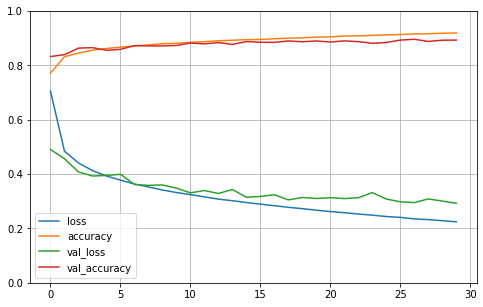

In [30]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid()
plt.gca().set_ylim(0, 1)
# plt.gca().set_xlim(0, 1)
plt.show()

In [31]:
model.metrics_names

['loss', 'accuracy']

In [32]:
# 모델평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

10000/1 - 0s - loss: 0.2477 - accuracy: 0.8868


In [33]:
# 분류 예측하기
predictions = model.predict(x_test)
print(predictions[0])
print(class_names[y_test[0]], '=>', class_names[np.argmax(predictions[0])])

[2.8786121e-06 9.8153123e-07 2.0126504e-06 7.8365690e-07 1.2978595e-06
 2.7024939e-03 5.9259878e-06 2.4391446e-02 1.4373971e-04 9.7274858e-01]
Ankle boot => Ankle boot


In [34]:
np.max(history.history['val_accuracy'])

0.896

In [35]:
for i in range(0, 100):
    print(class_names[y_test[i]], '=>', class_names[np.argmax(predictions[i])])               

Ankle boot => Ankle boot
Pullover => Pullover
Trouser => Trouser
Trouser => Trouser
Shirt => Shirt
Trouser => Trouser
Coat => Coat
Shirt => Shirt
Sandal => Sandal
Sneaker => Sneaker
Coat => Coat
Sandal => Sandal
Sneaker => Sandal
Dress => Dress
Coat => Coat
Trouser => Trouser
Pullover => Pullover
Coat => Pullover
Bag => Bag
T-shirt/top => T-shirt/top
Pullover => Pullover
Sandal => Sandal
Sneaker => Sneaker
Ankle boot => Sandal
Trouser => Trouser
Coat => Pullover
Shirt => Shirt
T-shirt/top => T-shirt/top
Ankle boot => Ankle boot
Dress => Shirt
Bag => Bag
Bag => Bag
Dress => Dress
Dress => Dress
Bag => Bag
T-shirt/top => T-shirt/top
Sneaker => Sneaker
Sandal => Sandal
Sneaker => Sneaker
Ankle boot => Ankle boot
Shirt => T-shirt/top
Trouser => Trouser
Dress => Shirt
Sneaker => Sneaker
Shirt => Shirt
Sneaker => Sneaker
Pullover => Pullover
Trouser => Trouser
Pullover => Pullover
Pullover => Shirt
Coat => Coat
Coat => Pullover
Sandal => Sandal
Bag => Bag
Pullover => Pullover
Pullover => Pul

In [36]:
x_new = x_test[:3]
y_proba = model.predict(x_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [37]:
y_pred = model.predict_classes(x_new)
y_pred

array([9, 2, 1])

In [38]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [39]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## 2. 시퀀셜 API를 사용하여 회귀용 다층 퍼셉트론 만들기

In [40]:
housing = fetch_california_housing()

In [41]:
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full)

In [42]:
# 정규화
scaler = StandardScaler()

In [43]:
# Valid = 검증세트
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [44]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)
])

In [45]:
model.compile(loss=keras.losses.mean_squared_error, optimizer='sgd')

In [46]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 77us/sample - loss: 0.8122 - val_loss: 0.5226
Epoch 2/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4924 - val_loss: 0.4934
Epoch 3/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4602 - val_loss: 0.4645
Epoch 4/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4408 - val_loss: 0.4549
Epoch 5/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4295 - val_loss: 0.4487
Epoch 6/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4194 - val_loss: 0.4381
Epoch 7/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4163 - val_loss: 0.4314
Epoch 8/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4065 - val_loss: 0.4287
Epoch 9/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4026 - val_l

In [47]:
mse_test = model.evaluate(x_test, y_test)
x_new = x_test[:3]           #새로운 샘플이라 생각하면됩니다.
y_pred = model.predict(x_new)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

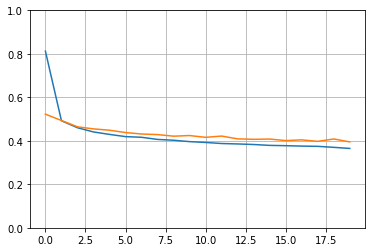

In [48]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 함수형 API를 사용해 복잡한 모델 만들기

In [49]:
input_ = keras.layers.Input(x_train.shape[1:])
hidden1 = keras.layers.Dense(30, 'relu')(input_)
hidden2 = keras.layers.Dense(30, 'relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [50]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [51]:
x_new = x_test[:3]           #새로운 샘플이라 생각하면됩니다.
y_pred = model.predict(x_new)
y_pred

array([[-0.567342  ],
       [-0.4802124 ],
       [ 0.37985262]], dtype=float32)

In [52]:
# Input_B는 딥러닝을 하고 마지막에 Input_A와 합친 후에 출력한다.
input_A = keras.layers.Input([5], name='wide_input')
input_B = keras.layers.Input([6], name='deep_input')
hidden1 = keras.layers.Dense(30, 'relu')(input_B)
hidden2 = keras.layers.Dense(30, 'relu')(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [53]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           930         dense_8[0][0]                    
____________________________________________________________________________________________

In [54]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

In [55]:
x_train_A, x_train_B = x_train[:, :5], x_train[:, 2:]
x_valid_A, x_valid_B = x_valid[:, :5], x_valid[:, 2:]
x_test_A, x_test_B = x_test[:, :5], x_test[:, 2:]
x_new_A, x_new_B = x_test_A[:3], x_test_B[:3]

In [56]:
history = model.fit((x_train_A, x_train_B), y_train, epochs=20, validation_data=((x_valid_A, x_valid_B), y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 85us/sample - loss: 2.4850 - val_loss: 1.0706
Epoch 2/20
11610/11610 [==============================] - 1s 48us/sample - loss: 0.8921 - val_loss: 0.7587
Epoch 3/20
11610/11610 [==============================] - 1s 47us/sample - loss: 0.7100 - val_loss: 0.6644
Epoch 4/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.6376 - val_loss: 0.6183
Epoch 5/20
11610/11610 [==============================] - 1s 49us/sample - loss: 0.5962 - val_loss: 0.5858
Epoch 6/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.5681 - val_loss: 0.5659
Epoch 7/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.5486 - val_loss: 0.5485
Epoch 8/20
11610/11610 [==============================] - 1s 49us/sample - loss: 0.5338 - val_loss: 0.5385
Epoch 9/20
11610/11610 [==============================] - 1s 47us/sample - loss: 0.5233 - val_l

In [57]:
mse_test = model.evaluate((x_test_A, x_test_B), y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [58]:
y_pred = model.predict((x_new_A, x_new_B))

In [59]:
y_pred

array([[0.6795223],
       [1.7946545],
       [2.8112874]], dtype=float32)

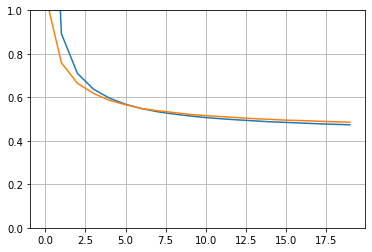

In [60]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [61]:
# Input_B는 딥러닝을 하고 마지막에 Input_A와 합친 후에 출력한다.
# 출력층 2개 메인출력층, 보조출력층ㄴ
input_A = keras.layers.Input([5], name='wide_input')
input_B = keras.layers.Input([6], name='deep_input')
hidden1 = keras.layers.Dense(30, 'relu')(input_B)
hidden2 = keras.layers.Dense(30, 'relu')(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [62]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 30)           930         dense_10[0][0]                   
____________________________________________________________________________________________

In [63]:
x_train_A, x_train_B = x_train[:, :5], x_train[:, 2:]
x_valid_A, x_valid_B = x_valid[:, :5], x_valid[:, 2:]
x_test_A, x_test_B = x_test[:, :5], x_test[:, 2:]
x_new_A, x_new_B = x_test_A[:3], x_test_B[:3]

In [64]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

In [65]:
history = model.fit([x_train_A, x_train_B], [y_train, y_train], epochs=20, validation_data=([x_valid_A, x_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 125us/sample - loss: 1.1645 - main_output_loss: 1.0192 - aux_output_loss: 2.4701 - val_loss: 0.6464 - val_main_output_loss: 0.5533 - val_aux_output_loss: 1.4827
Epoch 2/20
11610/11610 [==============================] - 1s 58us/sample - loss: 0.5961 - main_output_loss: 0.5115 - aux_output_loss: 1.3574 - val_loss: 0.5938 - val_main_output_loss: 0.5171 - val_aux_output_loss: 1.2829
Epoch 3/20
11610/11610 [==============================] - 1s 60us/sample - loss: 0.5465 - main_output_loss: 0.4722 - aux_output_loss: 1.2143 - val_loss: 0.5462 - val_main_output_loss: 0.4779 - val_aux_output_loss: 1.1602
Epoch 4/20
11610/11610 [==============================] - 1s 55us/sample - loss: 0.5170 - main_output_loss: 0.4524 - aux_output_loss: 1.0977 - val_loss: 0.5240 - val_main_output_loss: 0.4655 - val_aux_output_loss: 1.0494
Epoch 5/20
11610/11610 [==============================] - 1s 56us/

In [66]:
# 모델 저장
model.save('./models/my_keras_model_multi_IO_model.h5')

In [67]:
# 콜백
checkpoint_cv = keras.callbacks.ModelCheckpoint('./models/my_keras_model_multi_IO_model.h5', save_best_only=True)
history = model.fit([x_train_A, x_train_B], [y_train, y_train], epochs=20, validation_data=([x_valid_A, x_valid_B], [y_valid, y_valid]), callbacks=[checkpoint_cv])

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 56us/sample - loss: 0.3668 - main_output_loss: 0.3506 - aux_output_loss: 0.5120 - val_loss: 0.3861 - val_main_output_loss: 0.3690 - val_aux_output_loss: 0.5394
Epoch 2/20
11610/11610 [==============================] - 1s 54us/sample - loss: 0.3631 - main_output_loss: 0.3473 - aux_output_loss: 0.5066 - val_loss: 0.3972 - val_main_output_loss: 0.3819 - val_aux_output_loss: 0.5347
Epoch 3/20
11610/11610 [==============================] - 1s 52us/sample - loss: 0.3609 - main_output_loss: 0.3453 - aux_output_loss: 0.5008 - val_loss: 0.3985 - val_main_output_loss: 0.3832 - val_aux_output_loss: 0.5354
Epoch 4/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.3602 - main_output_loss: 0.3448 - aux_output_loss: 0.4980 - val_loss: 0.3822 - val_main_output_loss: 0.3662 - val_aux_output_loss: 0.5251
Epoch 5/20
11610/11610 [==============================] - 1s 51us/s

In [68]:
model.save_weights('./weights/my_keras_model_multi_IO_model.ckpt')

In [69]:
model.load_weights('./weights/my_keras_model_multi_IO_model.ckpt')

In [70]:
model = keras.models.load_model('./models/my_keras_model_multi_IO_model.h5')

In [71]:
total_loss, main_loss, aux_loss = model.evaluate([x_test_A, x_test_B], [y_test, y_test])
y_pred, y_pred_aux = model.predict([x_new_A, x_new_B])

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [72]:
total_loss, main_loss, aux_loss

(0.34758535124534784, 0.33513266, 0.45947954)

In [73]:
y_pred, y_pred_aux

(array([[0.54986286],
        [1.2821355 ],
        [3.6790128 ]], dtype=float32),
 array([[0.72584873],
        [1.4408966 ],
        [3.0669992 ]], dtype=float32))

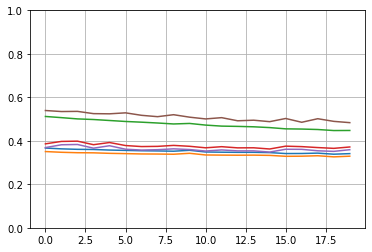

In [74]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 서브클래싱 API로 동적 모델 만들기

In [75]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)         # 표준 매개변수를 처리함(name같은거)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
       
        return main_output, aux_output

In [76]:
model = WideAndDeepModel()

In [77]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [78]:
history = model.fit((x_train_A, x_train_B), (y_train, y_train), epochs=10, validation_data=((x_valid_A, x_valid_B), (y_valid, y_valid)))

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 118us/sample - loss: 2.8244 - output_1_loss: 2.7235 - output_2_loss: 3.7245 - val_loss: 1.4233 - val_output_1_loss: 1.2434 - val_output_2_loss: 3.0413
Epoch 2/10
11610/11610 [==============================] - 1s 52us/sample - loss: 1.1071 - output_1_loss: 0.9534 - output_2_loss: 2.4865 - val_loss: 0.9470 - val_output_1_loss: 0.7941 - val_output_2_loss: 2.3224
Epoch 3/10
11610/11610 [==============================] - 1s 56us/sample - loss: 0.8637 - output_1_loss: 0.7417 - output_2_loss: 1.9626 - val_loss: 0.8273 - val_output_1_loss: 0.7029 - val_output_2_loss: 1.9457
Epoch 4/10
11610/11610 [==============================] - 1s 57us/sample - loss: 0.7795 - output_1_loss: 0.6797 - output_2_loss: 1.6784 - val_loss: 0.7701 - val_output_1_loss: 0.6650 - val_output_2_loss: 1.7140
Epoch 5/10
11610/11610 [==============================] - 1s 57us/sample - loss: 0.7321 - output_1_loss: 0

In [79]:
# evaluate 오차추정치
total_loss, main_loss, aux_loss = model.evaluate((x_test_A, x_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((x_new_A, x_new_B))

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [80]:
# 모델 저장 및 복원
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [81]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))
mse_test = model.evaluate(x_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 74us/sample - loss: 1.7848 - val_loss: 0.8235
Epoch 2/10
11610/11610 [==============================] - 0s 42us/sample - loss: 0.7755 - val_loss: 0.7481
Epoch 3/10
11610/11610 [==============================] - 0s 41us/sample - loss: 0.7179 - val_loss: 0.7109
Epoch 4/10
11610/11610 [==============================] - 1s 45us/sample - loss: 0.6786 - val_loss: 0.6737
Epoch 5/10
11610/11610 [==============================] - 1s 44us/sample - loss: 0.6432 - val_loss: 0.6424
Epoch 6/10
11610/11610 [==============================] - 0s 43us/sample - loss: 0.6103 - val_loss: 0.6128
Epoch 7/10
11610/11610 [==============================] - 0s 41us/sample - loss: 0.5800 - val_loss: 0.5863
Epoch 8/10
11610/11610 [==============================] - 0s 41us/sample - loss: 0.5536 - val_loss: 0.5613
Epoch 9/10
11610/11610 [==============================] - 0s 42us/sample - loss: 0.5300 - val_l

In [82]:
model.save("./models/my_keras_model.h5")

In [83]:
model = keras.models.load_model("./models/my_keras_model.h5")

In [84]:
model.predict(x_new)

array([[0.88025314],
       [1.4601943 ],
       [3.1442142 ]], dtype=float32)

In [85]:
model.save_weights("./models/my_keras_weights.ckpt")

In [86]:
model.load_weights("./models/my_keras_weights.ckpt")

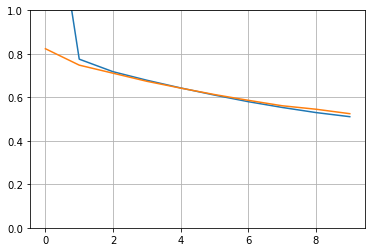

In [87]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 훈련과정에서 콜백하기

In [88]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [89]:
model.compile(loss='mse', optimizer = keras.optimizers.SGD(1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint('./models/my_keras_model.h5', save_best_only=True)

In [90]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid), callbacks=[checkpoint_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 86us/sample - loss: 1.6941 - val_loss: 0.8635
Epoch 2/10
11610/11610 [==============================] - 0s 43us/sample - loss: 0.7463 - val_loss: 0.6702
Epoch 3/10
11610/11610 [==============================] - 0s 41us/sample - loss: 0.6483 - val_loss: 0.6258
Epoch 4/10
11610/11610 [==============================] - 0s 40us/sample - loss: 0.6086 - val_loss: 0.5937
Epoch 5/10
11610/11610 [==============================] - 0s 41us/sample - loss: 0.5785 - val_loss: 0.5683
Epoch 6/10
11610/11610 [==============================] - 1s 43us/sample - loss: 0.5544 - val_loss: 0.5488
Epoch 7/10
11610/11610 [==============================] - 0s 41us/sample - loss: 0.5344 - val_loss: 0.5315
Epoch 8/10
11610/11610 [==============================] - 0s 41us/sample - loss: 0.5178 - val_loss: 0.5183
Epoch 9/10
11610/11610 [==============================] - 1s 43us/sample - loss: 0.5039 - val_l

In [91]:
model = keras.models.load_model('./models/my_keras_model.h5')

In [92]:
mse_test =model.evaluate(x_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [93]:
model.compile(loss = 'mse', optimizer=keras.optimizers.SGD(1e-3))

In [94]:
# 훈련 조기 종료 (모델이 향상되지 않으면)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [95]:
# 체크포인트 저장 (위 checkpoint_cb), 조기 종료(early_stopping_cb)를 callbacks 인자에 넣어둠 (리스트형식)
# epochs  횟수는 상관없음
history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/1000
11610/11610 [==============================] - 1s 74us/sample - loss: 0.4829 - val_loss: 0.4888
Epoch 2/1000
11610/11610 [==============================] - 0s 43us/sample - loss: 0.4743 - val_loss: 0.4840
Epoch 3/1000
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4676 - val_loss: 0.4759
Epoch 4/1000
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4612 - val_loss: 0.4719
Epoch 5/1000
11610/11610 [==============================] - 1s 43us/sample - loss: 0.4558 - val_loss: 0.4665
Epoch 6/1000
11610/11610 [==============================] - 0s 43us/sample - loss: 0.4514 - val_loss: 0.4626
Epoch 7/1000
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4471 - val_loss: 0.4595
Epoch 8/1000
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4433 - val_loss: 0.4572
Epoch 9/1000
11610/11610 [==============================] - 1s 43us/sample - lo

11610/11610 [==============================] - 1s 45us/sample - loss: 0.3604 - val_loss: 0.3895
Epoch 76/1000
11610/11610 [==============================] - 0s 43us/sample - loss: 0.3598 - val_loss: 0.3897
Epoch 77/1000
11610/11610 [==============================] - 0s 41us/sample - loss: 0.3587 - val_loss: 0.3910
Epoch 78/1000
11610/11610 [==============================] - 1s 43us/sample - loss: 0.3585 - val_loss: 0.3887
Epoch 79/1000
11610/11610 [==============================] - 1s 48us/sample - loss: 0.3581 - val_loss: 0.3885
Epoch 80/1000
11610/11610 [==============================] - 1s 45us/sample - loss: 0.3576 - val_loss: 0.3876
Epoch 81/1000
11610/11610 [==============================] - 1s 43us/sample - loss: 0.3568 - val_loss: 0.3876
Epoch 82/1000
11610/11610 [==============================] - 1s 58us/sample - loss: 0.3564 - val_loss: 0.3869
Epoch 83/1000
11610/11610 [==============================] - 1s 47us/sample - loss: 0.3557 - val_loss: 0.3858
Epoch 84/1000
11610/1161

11610/11610 [==============================] - 0s 42us/sample - loss: 0.3286 - val_loss: 0.3674
Epoch 150/1000
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3282 - val_loss: 0.3685
Epoch 151/1000
11610/11610 [==============================] - 0s 42us/sample - loss: 0.3279 - val_loss: 0.3693
Epoch 152/1000
11610/11610 [==============================] - 1s 46us/sample - loss: 0.3273 - val_loss: 0.3667
Epoch 153/1000
11610/11610 [==============================] - 1s 44us/sample - loss: 0.3272 - val_loss: 0.3658
Epoch 154/1000
11610/11610 [==============================] - 1s 44us/sample - loss: 0.3265 - val_loss: 0.3659
Epoch 155/1000
11610/11610 [==============================] - 1s 44us/sample - loss: 0.3259 - val_loss: 0.3693
Epoch 156/1000
11610/11610 [==============================] - 1s 44us/sample - loss: 0.3261 - val_loss: 0.3661
Epoch 157/1000
11610/11610 [==============================] - 1s 44us/sample - loss: 0.3257 - val_loss: 0.3643
Epoch 158/1000
1

Epoch 223/1000
11610/11610 [==============================] - 0s 41us/sample - loss: 0.3089 - val_loss: 0.3514
Epoch 224/1000
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3081 - val_loss: 0.3511
Epoch 225/1000
11610/11610 [==============================] - 1s 43us/sample - loss: 0.3085 - val_loss: 0.3513
Epoch 226/1000
11610/11610 [==============================] - 1s 44us/sample - loss: 0.3083 - val_loss: 0.3509
Epoch 227/1000
11610/11610 [==============================] - 0s 42us/sample - loss: 0.3080 - val_loss: 0.3515
Epoch 228/1000
11610/11610 [==============================] - 1s 47us/sample - loss: 0.3079 - val_loss: 0.3506
Epoch 229/1000
11610/11610 [==============================] - 1s 49us/sample - loss: 0.3075 - val_loss: 0.3509
Epoch 230/1000
11610/11610 [==============================] - 0s 43us/sample - loss: 0.3075 - val_loss: 0.3504
Epoch 231/1000
11610/11610 [==============================] - 0s 41us/sample - loss: 0.3071 - val_loss: 0.3515
E

Epoch 297/1000
11610/11610 [==============================] - 1s 45us/sample - loss: 0.2946 - val_loss: 0.3382
Epoch 298/1000
11610/11610 [==============================] - 1s 43us/sample - loss: 0.2941 - val_loss: 0.3372
Epoch 299/1000
11610/11610 [==============================] - 0s 40us/sample - loss: 0.2938 - val_loss: 0.3374
Epoch 300/1000
11610/11610 [==============================] - 0s 41us/sample - loss: 0.2936 - val_loss: 0.3432
Epoch 301/1000
11610/11610 [==============================] - 0s 43us/sample - loss: 0.2937 - val_loss: 0.3388
Epoch 302/1000
11610/11610 [==============================] - 1s 43us/sample - loss: 0.2938 - val_loss: 0.3390
Epoch 303/1000
11610/11610 [==============================] - 0s 43us/sample - loss: 0.2933 - val_loss: 0.3373
Epoch 304/1000
11610/11610 [==============================] - 0s 41us/sample - loss: 0.2933 - val_loss: 0.3373
Epoch 305/1000
11610/11610 [==============================] - 0s 40us/sample - loss: 0.2932 - val_loss: 0.3380
E

In [96]:
class PrintValTrainRatioCallBack(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print('\nval/train: {:.2f}'.format(logs['val_loss'] / logs['loss']))

In [97]:
val_train_ratio_cb = PrintValTrainRatioCallBack()
history = model.fit(x_train , y_train, epochs=1, validation_data=(x_valid, y_valid), callbacks=[val_train_ratio_cb])

Train on 11610 samples, validate on 3870 samples
10016/11610 [========================>.....] - ETA: 0s - loss: 0.2947
val/train: 1.16
11610/11610 [==============================] - 0s 43us/sample - loss: 0.2938 - val_loss: 0.3400


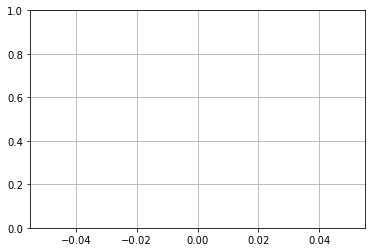

In [98]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 텐서보드 ↓

In [99]:
import os

In [100]:
root_logdir = os.path.join(os.curdir,'my_logs')

In [101]:
def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

In [102]:
run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2020_06_28-14_11_30'

In [103]:
keras.backend.clear_session()

In [104]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1),
])

In [105]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(1e-3))

In [106]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid), callbacks=[tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 82us/sample - loss: 1.9271 - val_loss: 0.8532
Epoch 2/30
11610/11610 [==============================] - 0s 40us/sample - loss: 0.7824 - val_loss: 0.7446
Epoch 3/30
11610/11610 [==============================] - 0s 40us/sample - loss: 0.7072 - val_loss: 0.6935
Epoch 4/30
11610/11610 [==============================] - 0s 40us/sample - loss: 0.6616 - val_loss: 0.6546
Epoch 5/30
11610/11610 [==============================] - 0s 40us/sample - loss: 0.6253 - val_loss: 0.6225
Epoch 6/30
11610/11610 [==============================] - 0s 40us/sample - loss: 0.5953 - val_loss: 0.5982
Epoch 7/30
11610/11610 [==============================] - 0s 41us/sample - loss: 0.5697 - val_loss: 0.5732
Epoch 8/30
11610/11610 [==============================] - 0s 40us/sample - loss: 0.5477 - val_loss: 0.5542
Epoch 9/30
11610/11610 [==============================] - 0s 42us/sample - loss: 0.5295 - val_l

In [108]:
run_logdir2 = get_run_logdir()
run_logdir2

'./my_logs/run_2020_06_28-14_11_45'

In [109]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(1e-5))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid), callbacks=[tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 72us/sample - loss: 0.4260 - val_loss: 0.4472
Epoch 2/30
11610/11610 [==============================] - 0s 43us/sample - loss: 0.4259 - val_loss: 0.4471
Epoch 3/30
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4258 - val_loss: 0.4470
Epoch 4/30
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4257 - val_loss: 0.4470
Epoch 5/30
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4257 - val_loss: 0.4469
Epoch 6/30
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4257 - val_loss: 0.4469
Epoch 7/30
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4256 - val_loss: 0.4468
Epoch 8/30
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4256 - val_loss: 0.4468
Epoch 9/30
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4255 - val_l

In [110]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module tensorflow.python.keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, update_freq='epoch', profile_batch=2, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



In [111]:
test_logdir = get_run_logdir()

In [112]:
writer = tf.summary.create_file_writer(test_logdir)

In [113]:
with writer.as_default():
    for step in range(1, 1000+1):
        tf.summary.scalar('my_scaler', np.sin(step/10), step = step)
        data = (np.random.randn(100)+2) * step / 100
        tf.summary.histogram('my_hist', data, buckets=50, step = step)
        images = np.random.rand(2, 32, 32, 3)
        tf.summary.image('my_images', images * step / 1000, step = step)
        texts = ['the step is ' + str(step), 'Its square is ' + str(step**2)]
        tf.summary.text('my_text', texts, step = step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave,  tf.float32), [1, -1, 1])
        tf.summary.audio('my_audio', audio, sample_rate=48000, step = step)

In [125]:
# %load_ext tensorboard
# %tensorboard --logdir ./my_logs --port = 6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--purge_orphaned_data BOOL] [--db URI] [--db_import]
                   [--inspect] [--version_tb] [--tag TAG] [--event_file PATH]
                   [--path_prefix PATH] [--window_title TEXT]
                   [--max_reload_threads COUNT] [--reload_interval SECONDS]
                   [--reload_task TYPE] [--reload_multifile BOOL]
                   [--reload_multifile_inactive_secs SECONDS]
                   [--generic_data TYPE]
                   [--samples_per_plugin SAMPLES_PER_PLUGIN]
                   [--debugger_data_server_grpc_port PORT]
                   [--debugger_port PORT] [--master_tpu_unsecure_channel ADDR]
tensorboard: error: argument --port: invalid <lambda> value: '='

## 하이퍼파라미터 튜닝

In [114]:
def build_model(n_hidden=1, n_neurons=30, learning_rate = 3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    
    return model

In [115]:
# wrappers = 포장지
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [116]:
# patience = 참을성
keras_reg.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 63us/sample - loss: 1.2308 - val_loss: 0.7096
Epoch 2/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.6715 - val_loss: 0.6210
Epoch 3/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.5762 - val_loss: 0.5593
Epoch 4/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.5325 - val_loss: 0.5317
Epoch 5/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.5032 - val_loss: 0.5115
Epoch 6/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.4864 - val_loss: 0.4968
Epoch 7/100
11610/11610 [==============================] - 1s 47us/sample - loss: 0.4720 - val_loss: 0.4853
Epoch 8/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4627 - val_loss: 0.4766
Epoch 9/100
11610/11610 [==============================] - 0s 38us/sample - loss: 0.453

Epoch 76/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3525 - val_loss: 0.3872
Epoch 77/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3522 - val_loss: 0.3843
Epoch 78/100
11610/11610 [==============================] - 0s 38us/sample - loss: 0.3513 - val_loss: 0.3825
Epoch 79/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3508 - val_loss: 0.3831
Epoch 80/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3493 - val_loss: 0.3835
Epoch 81/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3493 - val_loss: 0.3837
Epoch 82/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3495 - val_loss: 0.3813
Epoch 83/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.3481 - val_loss: 0.3820
Epoch 84/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3474 - val_loss: 0.3890
Epoch 85/100
11610/

In [117]:
mse_test = keras_reg.score(x_test, y_test)
y_pred = keras_reg.predict(x_new)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [118]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [119]:
param_distribs = {
    'n_hidden' : [0, 1, 2, 3],
    'n_neurons' : np.arange(1, 100),
    'learning_rate' : reciprocal(3e-4, 3e-2),
}

In [120]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)

In [121]:
rnd_search_cv.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.0011195351881132835, n_hidden=3, n_neurons=35 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


7740/7740 [==============================] - 1s 103us/sample - loss: 1.9030 - val_loss: 1.0067
Epoch 2/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.8097 - val_loss: 0.7679
Epoch 3/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.7063 - val_loss: 0.7045
Epoch 4/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.6625 - val_loss: 0.6681
Epoch 5/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.6317 - val_loss: 0.6384
Epoch 6/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.6074 - val_loss: 0.6165
Epoch 7/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.5881 - val_loss: 0.5983
Epoch 8/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.5721 - val_loss: 0.5825
Epoch 9/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.5589 - val_loss: 0.5696
Epoch 10/100
7740/7740 [==============================] -

Epoch 78/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.3680 - val_loss: 0.3997
Epoch 79/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.3667 - val_loss: 0.3977
Epoch 80/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.3654 - val_loss: 0.3970
Epoch 81/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.3645 - val_loss: 0.3981
Epoch 82/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3636 - val_loss: 0.3953
Epoch 83/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3627 - val_loss: 0.3951
Epoch 84/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.3615 - val_loss: 0.3947
Epoch 85/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.3605 - val_loss: 0.3934
Epoch 86/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.3600 - val_loss: 0.3925
Epoch 87/100
7740/7740 [=============

[CV]  learning_rate=0.0011195351881132835, n_hidden=3, n_neurons=35, total=  41.2s
[CV] learning_rate=0.0011195351881132835, n_hidden=3, n_neurons=35 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   41.2s remaining:    0.0s


7740/7740 [==============================] - 1s 132us/sample - loss: 2.2681 - val_loss: 1.1290
Epoch 2/100
7740/7740 [==============================] - 1s 74us/sample - loss: 0.8627 - val_loss: 0.7216
Epoch 3/100
7740/7740 [==============================] - 1s 70us/sample - loss: 0.6514 - val_loss: 0.6399
Epoch 4/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.5947 - val_loss: 0.6083
Epoch 5/100
7740/7740 [==============================] - 1s 104us/sample - loss: 0.5644 - val_loss: 0.5859
Epoch 6/100
7740/7740 [==============================] - 1s 93us/sample - loss: 0.5419 - val_loss: 0.5662
Epoch 7/100
7740/7740 [==============================] - 1s 101us/sample - loss: 0.5237 - val_loss: 0.5501
Epoch 8/100
7740/7740 [==============================] - 1s 87us/sample - loss: 0.5081 - val_loss: 0.5367
Epoch 9/100
7740/7740 [==============================] - 1s 80us/sample - loss: 0.4951 - val_loss: 0.5253
Epoch 10/100
7740/7740 [==============================]

7740/7740 [==============================] - 0s 49us/sample - loss: 0.3537 - val_loss: 0.4017
Epoch 78/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3527 - val_loss: 0.4000
Epoch 79/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.3522 - val_loss: 0.4001
Epoch 80/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.3516 - val_loss: 0.3993
Epoch 81/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.3507 - val_loss: 0.3991
Epoch 82/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.3496 - val_loss: 0.3988
Epoch 83/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3491 - val_loss: 0.3977
Epoch 84/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3482 - val_loss: 0.3986
Epoch 85/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.3477 - val_loss: 0.3960
Epoch 86/100
7740/7740 [==========================

[CV]  learning_rate=0.0011195351881132835, n_hidden=3, n_neurons=35, total=  47.2s
[CV] learning_rate=0.0011195351881132835, n_hidden=3, n_neurons=35 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 105us/sample - loss: 3.0514 - val_loss: 1.1342
Epoch 2/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.9228 - val_loss: 0.7549
Epoch 3/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.7234 - val_loss: 0.6716
Epoch 4/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.6646 - val_loss: 0.6381
Epoch 5/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.6322 - val_loss: 0.6153
Epoch 6/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.6074 - val_loss: 0.5960
Epoch 7/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.5870 - val_loss: 0.5790
Epoch 8/100
7740/7740 [==============================] 

Epoch 76/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3663 - val_loss: 0.3938
Epoch 77/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3653 - val_loss: 0.3919
Epoch 78/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.3642 - val_loss: 0.3937
Epoch 79/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.3634 - val_loss: 0.3904
Epoch 80/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3627 - val_loss: 0.3885
Epoch 81/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.3615 - val_loss: 0.3884
Epoch 82/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.3609 - val_loss: 0.3898
Epoch 83/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3602 - val_loss: 0.3865
Epoch 84/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3591 - val_loss: 0.3863
Epoch 85/100
7740/7740 [=============

[CV]  learning_rate=0.0011195351881132835, n_hidden=3, n_neurons=35, total=  40.8s
[CV] learning_rate=0.0019193781100231727, n_hidden=1, n_neurons=75 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 98us/sample - loss: 1.6389 - val_loss: 0.8136
Epoch 2/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.7064 - val_loss: 0.6768
Epoch 3/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.6415 - val_loss: 0.6256
Epoch 4/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.6037 - val_loss: 0.5933
Epoch 5/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.5752 - val_loss: 0.5680
Epoch 6/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5520 - val_loss: 0.5472
Epoch 7/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5341 - val_loss: 0.5317
Epoch 8/100
7740/7740 [==============================] -

Epoch 76/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3822 - val_loss: 0.4099
Epoch 77/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3814 - val_loss: 0.4090
Epoch 78/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3805 - val_loss: 0.4083
Epoch 79/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3797 - val_loss: 0.4080
Epoch 80/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3792 - val_loss: 0.4070
Epoch 81/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3784 - val_loss: 0.4087
Epoch 82/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3778 - val_loss: 0.4072
Epoch 83/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3769 - val_loss: 0.4058
Epoch 84/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3761 - val_loss: 0.4045
Epoch 85/100
7740/7740 [=============

[CV]  learning_rate=0.0019193781100231727, n_hidden=1, n_neurons=75, total=  35.0s
[CV] learning_rate=0.0019193781100231727, n_hidden=1, n_neurons=75 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 102us/sample - loss: 1.5905 - val_loss: 0.8355
Epoch 2/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.7762 - val_loss: 0.7232
Epoch 3/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.6795 - val_loss: 0.6688
Epoch 4/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.6342 - val_loss: 0.6289
Epoch 5/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5951 - val_loss: 0.5989
Epoch 6/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5637 - val_loss: 0.5746
Epoch 7/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5410 - val_loss: 0.5513
Epoch 8/100
7740/7740 [==============================] 

Epoch 76/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3843 - val_loss: 0.4156
Epoch 77/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3833 - val_loss: 0.4156
Epoch 78/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3830 - val_loss: 0.4147
Epoch 79/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3823 - val_loss: 0.4137
Epoch 80/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3811 - val_loss: 0.4131
Epoch 81/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3809 - val_loss: 0.4139
Epoch 82/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3803 - val_loss: 0.4121
Epoch 83/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3797 - val_loss: 0.4114
Epoch 84/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3789 - val_loss: 0.4108
Epoch 85/100
7740/7740 [=============

[CV]  learning_rate=0.0019193781100231727, n_hidden=1, n_neurons=75, total=  33.8s
[CV] learning_rate=0.0019193781100231727, n_hidden=1, n_neurons=75 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 85us/sample - loss: 1.9848 - val_loss: 0.7973
Epoch 2/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.8098 - val_loss: 0.6710
Epoch 3/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.6613 - val_loss: 0.6257
Epoch 4/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.6180 - val_loss: 0.5907
Epoch 5/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5825 - val_loss: 0.5619
Epoch 6/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5534 - val_loss: 0.5381
Epoch 7/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5300 - val_loss: 0.5209
Epoch 8/100
7740/7740 [==============================] -

Epoch 76/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3795 - val_loss: 0.4089
Epoch 77/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3790 - val_loss: 0.4060
Epoch 78/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3785 - val_loss: 0.4056
Epoch 79/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3775 - val_loss: 0.4065
Epoch 80/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3769 - val_loss: 0.4058
Epoch 81/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3761 - val_loss: 0.4053
Epoch 82/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3757 - val_loss: 0.4043
Epoch 83/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3750 - val_loss: 0.4029
Epoch 84/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3743 - val_loss: 0.4036
Epoch 85/100
7740/7740 [=============

[CV]  learning_rate=0.0019193781100231727, n_hidden=1, n_neurons=75, total=  33.6s
[CV] learning_rate=0.0007617196357040952, n_hidden=2, n_neurons=13 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 91us/sample - loss: 4.2592 - val_loss: 2.0151
Epoch 2/100
7740/7740 [==============================] - 0s 47us/sample - loss: 1.2990 - val_loss: 1.0385
Epoch 3/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.8775 - val_loss: 0.8206
Epoch 4/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.7671 - val_loss: 0.7455
Epoch 5/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.7189 - val_loss: 0.7094
Epoch 6/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.6911 - val_loss: 0.6877
Epoch 7/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.6723 - val_loss: 0.6728
Epoch 8/100
7740/7740 [==============================] -

Epoch 76/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4432 - val_loss: 0.4671
Epoch 77/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4426 - val_loss: 0.4664
Epoch 78/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4415 - val_loss: 0.4654
Epoch 79/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4409 - val_loss: 0.4651
Epoch 80/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4400 - val_loss: 0.4642
Epoch 81/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4392 - val_loss: 0.4648
Epoch 82/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4386 - val_loss: 0.4633
Epoch 83/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4378 - val_loss: 0.4632
Epoch 84/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4371 - val_loss: 0.4624
Epoch 85/100
7740/7740 [=============

[CV]  learning_rate=0.0007617196357040952, n_hidden=2, n_neurons=13, total=  35.4s
[CV] learning_rate=0.0007617196357040952, n_hidden=2, n_neurons=13 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 110us/sample - loss: 2.6979 - val_loss: 1.7875
Epoch 2/100
7740/7740 [==============================] - 0s 45us/sample - loss: 1.3638 - val_loss: 1.0643
Epoch 3/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.9043 - val_loss: 0.8247
Epoch 4/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.7499 - val_loss: 0.7234
Epoch 5/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.6784 - val_loss: 0.6779
Epoch 6/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.6419 - val_loss: 0.6486
Epoch 7/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.6192 - val_loss: 0.6327
Epoch 8/100
7740/7740 [==============================] 

Epoch 76/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4162 - val_loss: 0.4393
Epoch 77/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4150 - val_loss: 0.4388
Epoch 78/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4144 - val_loss: 0.4382
Epoch 79/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4133 - val_loss: 0.4379
Epoch 80/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4135 - val_loss: 0.4368
Epoch 81/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4121 - val_loss: 0.4369
Epoch 82/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4121 - val_loss: 0.4368
Epoch 83/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4111 - val_loss: 0.4355
Epoch 84/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4106 - val_loss: 0.4347
Epoch 85/100
7740/7740 [=============

[CV]  learning_rate=0.0007617196357040952, n_hidden=2, n_neurons=13, total=  35.2s
[CV] learning_rate=0.0007617196357040952, n_hidden=2, n_neurons=13 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 91us/sample - loss: 3.3595 - val_loss: 2.0621
Epoch 2/100
7740/7740 [==============================] - 0s 44us/sample - loss: 1.6708 - val_loss: 1.3684
Epoch 3/100
7740/7740 [==============================] - 0s 44us/sample - loss: 1.2293 - val_loss: 1.0633
Epoch 4/100
7740/7740 [==============================] - 0s 45us/sample - loss: 1.0016 - val_loss: 0.9035
Epoch 5/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.8697 - val_loss: 0.8164
Epoch 6/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.7927 - val_loss: 0.7657
Epoch 7/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.7444 - val_loss: 0.7339
Epoch 8/100
7740/7740 [==============================] -

Epoch 76/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4364 - val_loss: 0.4726
Epoch 77/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.4355 - val_loss: 0.4707
Epoch 78/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4345 - val_loss: 0.4692
Epoch 79/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.4335 - val_loss: 0.4689
Epoch 80/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4326 - val_loss: 0.4678
Epoch 81/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4317 - val_loss: 0.4665
Epoch 82/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.4308 - val_loss: 0.4652
Epoch 83/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4300 - val_loss: 0.4654
Epoch 84/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.4293 - val_loss: 0.4643
Epoch 85/100
7740/7740 [=============

[CV]  learning_rate=0.0007617196357040952, n_hidden=2, n_neurons=13, total=  36.4s
[CV] learning_rate=0.001529089812000745, n_hidden=2, n_neurons=19 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 95us/sample - loss: 1.9240 - val_loss: 1.0215
Epoch 2/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.7828 - val_loss: 0.7356
Epoch 3/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.6666 - val_loss: 0.6680
Epoch 4/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.6228 - val_loss: 0.6295
Epoch 5/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.5931 - val_loss: 0.6037
Epoch 6/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5720 - val_loss: 0.5866
Epoch 7/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.5555 - val_loss: 0.5716
Epoch 8/100
7740/7740 [==============================] -

Epoch 76/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.3790 - val_loss: 0.4175
Epoch 77/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.3781 - val_loss: 0.4164
Epoch 78/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3773 - val_loss: 0.4149
Epoch 79/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.3763 - val_loss: 0.4151
Epoch 80/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3766 - val_loss: 0.4149
Epoch 81/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.3755 - val_loss: 0.4156
Epoch 82/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3750 - val_loss: 0.4123
Epoch 83/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3740 - val_loss: 0.4121
Epoch 84/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3733 - val_loss: 0.4137
Epoch 85/100
7740/7740 [=============

[CV]  learning_rate=0.001529089812000745, n_hidden=2, n_neurons=19, total=  37.8s
[CV] learning_rate=0.001529089812000745, n_hidden=2, n_neurons=19 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 93us/sample - loss: 1.7009 - val_loss: 0.8455
Epoch 2/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.7374 - val_loss: 0.7193
Epoch 3/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.6639 - val_loss: 0.6812
Epoch 4/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.6269 - val_loss: 0.6474
Epoch 5/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5989 - val_loss: 0.6219
Epoch 6/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.5756 - val_loss: 0.6016
Epoch 7/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.5569 - val_loss: 0.5882
Epoch 8/100
7740/7740 [==============================] - 

7740/7740 [==============================] - 0s 44us/sample - loss: 0.3711 - val_loss: 0.4155
Epoch 76/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3705 - val_loss: 0.4143
Epoch 77/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3700 - val_loss: 0.4132
Epoch 78/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3694 - val_loss: 0.4130
Epoch 79/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3684 - val_loss: 0.4121
Epoch 80/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3682 - val_loss: 0.4124
Epoch 81/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3677 - val_loss: 0.4117
Epoch 82/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3672 - val_loss: 0.4115
Epoch 83/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3667 - val_loss: 0.4121
Epoch 84/100
7740/7740 [==========================

[CV]  learning_rate=0.001529089812000745, n_hidden=2, n_neurons=19, total=  36.5s
[CV] learning_rate=0.001529089812000745, n_hidden=2, n_neurons=19 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 116us/sample - loss: 2.3261 - val_loss: 1.2370
Epoch 2/100
7740/7740 [==============================] - 0s 45us/sample - loss: 1.0076 - val_loss: 0.8793
Epoch 3/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.7895 - val_loss: 0.7455
Epoch 4/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.7029 - val_loss: 0.6877
Epoch 5/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.6502 - val_loss: 0.6454
Epoch 6/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.6137 - val_loss: 0.6130
Epoch 7/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.5879 - val_loss: 0.5854
Epoch 8/100
7740/7740 [==============================] -

Epoch 76/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3748 - val_loss: 0.3976
Epoch 77/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3740 - val_loss: 0.3964
Epoch 78/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3737 - val_loss: 0.3953
Epoch 79/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.3724 - val_loss: 0.3965
Epoch 80/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3720 - val_loss: 0.3975
Epoch 81/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.3711 - val_loss: 0.3977
Epoch 82/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3704 - val_loss: 0.3944
Epoch 83/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3694 - val_loss: 0.3947
Epoch 84/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3697 - val_loss: 0.3947
Epoch 85/100
7740/7740 [=============

[CV]  learning_rate=0.001529089812000745, n_hidden=2, n_neurons=19, total=  37.4s
[CV] learning_rate=0.001609164958586291, n_hidden=2, n_neurons=13 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 94us/sample - loss: 2.8185 - val_loss: 1.0377
Epoch 2/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.8600 - val_loss: 0.7605
Epoch 3/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.7072 - val_loss: 0.6739
Epoch 4/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.6377 - val_loss: 0.6251
Epoch 5/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.5958 - val_loss: 0.5929
Epoch 6/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.5676 - val_loss: 0.5720
Epoch 7/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.5483 - val_loss: 0.5571
Epoch 8/100
7740/7740 [==============================] - 

Epoch 76/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4160 - val_loss: 0.4411
Epoch 77/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4149 - val_loss: 0.4399
Epoch 78/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4144 - val_loss: 0.4388
Epoch 79/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4132 - val_loss: 0.4388
Epoch 80/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4126 - val_loss: 0.4379
Epoch 81/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4111 - val_loss: 0.4364
Epoch 82/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4103 - val_loss: 0.4376
Epoch 83/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4095 - val_loss: 0.4364
Epoch 84/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.4087 - val_loss: 0.4346
Epoch 85/100
7740/7740 [=============

[CV]  learning_rate=0.001609164958586291, n_hidden=2, n_neurons=13, total=  36.4s
[CV] learning_rate=0.001609164958586291, n_hidden=2, n_neurons=13 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 91us/sample - loss: 2.3655 - val_loss: 1.2669
Epoch 2/100
7740/7740 [==============================] - 0s 44us/sample - loss: 1.0885 - val_loss: 0.9185
Epoch 3/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.8390 - val_loss: 0.7869
Epoch 4/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.7175 - val_loss: 0.7056
Epoch 5/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.6435 - val_loss: 0.6557
Epoch 6/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.5991 - val_loss: 0.6235
Epoch 7/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.5693 - val_loss: 0.5958
Epoch 8/100
7740/7740 [==============================] - 

Epoch 76/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.3824 - val_loss: 0.4158
Epoch 77/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3817 - val_loss: 0.4161
Epoch 78/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3812 - val_loss: 0.4156
Epoch 79/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3804 - val_loss: 0.4150
Epoch 80/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3795 - val_loss: 0.4133
Epoch 81/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.3792 - val_loss: 0.4129
Epoch 82/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.3784 - val_loss: 0.4119
Epoch 83/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3779 - val_loss: 0.4118
Epoch 84/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.3772 - val_loss: 0.4111
Epoch 85/100
7740/7740 [=============

[CV]  learning_rate=0.001609164958586291, n_hidden=2, n_neurons=13, total=  37.2s
[CV] learning_rate=0.001609164958586291, n_hidden=2, n_neurons=13 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 106us/sample - loss: 2.2395 - val_loss: 1.4496
Epoch 2/100
7740/7740 [==============================] - 0s 48us/sample - loss: 1.0102 - val_loss: 0.9027
Epoch 3/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.7577 - val_loss: 0.7447
Epoch 4/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.6974 - val_loss: 0.6846
Epoch 5/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.6613 - val_loss: 0.6484
Epoch 6/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.6350 - val_loss: 0.6230
Epoch 7/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.6113 - val_loss: 0.6021
Epoch 8/100
7740/7740 [==============================] -

Epoch 76/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3957 - val_loss: 0.4177
Epoch 77/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3956 - val_loss: 0.4165
Epoch 78/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.3945 - val_loss: 0.4147
Epoch 79/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3936 - val_loss: 0.4142
Epoch 80/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3927 - val_loss: 0.4149
Epoch 81/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3922 - val_loss: 0.4129
Epoch 82/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3906 - val_loss: 0.4125
Epoch 83/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3902 - val_loss: 0.4120
Epoch 84/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3896 - val_loss: 0.4105
Epoch 85/100
7740/7740 [=============

[CV]  learning_rate=0.001609164958586291, n_hidden=2, n_neurons=13, total=  36.7s
[CV] learning_rate=0.004778223340688506, n_hidden=2, n_neurons=79 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 131us/sample - loss: 1.0235 - val_loss: 0.6526
Epoch 2/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.6015 - val_loss: 0.5609
Epoch 3/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.5303 - val_loss: 0.5123
Epoch 4/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4900 - val_loss: 0.4841
Epoch 5/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4665 - val_loss: 0.4679
Epoch 6/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4502 - val_loss: 0.4610
Epoch 7/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4399 - val_loss: 0.4532
Epoch 8/100
7740/7740 [==============================] -

Epoch 76/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.3001 - val_loss: 0.3562
Epoch 77/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.2999 - val_loss: 0.3499
Epoch 78/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.2978 - val_loss: 0.3518
Epoch 79/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.2993 - val_loss: 0.3512
Epoch 80/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.2975 - val_loss: 0.3497
Epoch 81/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.2978 - val_loss: 0.3528
Epoch 82/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.2969 - val_loss: 0.3483
Epoch 83/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.2953 - val_loss: 0.3494
Epoch 84/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.2954 - val_loss: 0.3458
Epoch 85/100
7740/7740 [=============

[CV]  learning_rate=0.004778223340688506, n_hidden=2, n_neurons=79, total=  50.8s
[CV] learning_rate=0.004778223340688506, n_hidden=2, n_neurons=79 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 128us/sample - loss: 1.1371 - val_loss: 0.6336
Epoch 2/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.5627 - val_loss: 0.5496
Epoch 3/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4885 - val_loss: 0.5017
Epoch 4/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4555 - val_loss: 0.4785
Epoch 5/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4353 - val_loss: 0.4587
Epoch 6/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4215 - val_loss: 0.4486
Epoch 7/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4115 - val_loss: 0.4430
Epoch 8/100
7740/7740 [==============================] -

Epoch 76/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.2886 - val_loss: 0.3535
Epoch 77/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.2888 - val_loss: 0.3512
Epoch 78/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.2907 - val_loss: 0.3621
Epoch 79/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.2873 - val_loss: 0.3488
Epoch 80/100
7740/7740 [==============================] - 1s 71us/sample - loss: 0.2853 - val_loss: 0.3464
Epoch 81/100
7740/7740 [==============================] - 1s 73us/sample - loss: 0.2866 - val_loss: 0.3401
Epoch 82/100
7740/7740 [==============================] - 1s 79us/sample - loss: 0.2837 - val_loss: 0.3423
Epoch 83/100
7740/7740 [==============================] - 1s 79us/sample - loss: 0.2852 - val_loss: 0.3433
Epoch 84/100
7740/7740 [==============================] - 1s 77us/sample - loss: 0.2821 - val_loss: 0.3451
Epoch 85/100
7740/7740 [=============

[CV]  learning_rate=0.004778223340688506, n_hidden=2, n_neurons=79, total=  48.0s
[CV] learning_rate=0.004778223340688506, n_hidden=2, n_neurons=79 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 122us/sample - loss: 1.5868 - val_loss: 1.5145
Epoch 2/100
7740/7740 [==============================] - 0s 64us/sample - loss: 2.2078 - val_loss: 0.7847
Epoch 3/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.8543 - val_loss: 0.5938
Epoch 4/100
7740/7740 [==============================] - 1s 79us/sample - loss: 0.5431 - val_loss: 0.5357
Epoch 5/100
7740/7740 [==============================] - 1s 78us/sample - loss: 0.5054 - val_loss: 0.5152
Epoch 6/100
7740/7740 [==============================] - 1s 75us/sample - loss: 0.5041 - val_loss: 0.4990
Epoch 7/100
7740/7740 [==============================] - 1s 74us/sample - loss: 0.5027 - val_loss: 0.4644
Epoch 8/100
7740/7740 [==============================] -

7740/7740 [==============================] - 1s 66us/sample - loss: 0.2885 - val_loss: 0.3333
Epoch 76/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.2883 - val_loss: 0.3367
Epoch 77/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.2857 - val_loss: 0.3343
Epoch 78/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.2855 - val_loss: 0.3361
Epoch 79/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.2853 - val_loss: 0.3396
Epoch 80/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.2839 - val_loss: 0.3324
Epoch 81/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.2845 - val_loss: 0.3362
Epoch 82/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.2839 - val_loss: 0.3295
Epoch 83/100
7740/7740 [==============================] - 0s 65us/sample - loss: 0.2843 - val_loss: 0.3321
Epoch 84/100
7740/7740 [==========================

[CV]  learning_rate=0.004778223340688506, n_hidden=2, n_neurons=79, total=  55.5s
[CV] learning_rate=0.0025475864965582005, n_hidden=0, n_neurons=46 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 82us/sample - loss: 3.1054 - val_loss: 1.3014
Epoch 2/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.9151 - val_loss: 0.7581
Epoch 3/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.6865 - val_loss: 0.6668
Epoch 4/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.6343 - val_loss: 0.6273
Epoch 5/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.6067 - val_loss: 0.6025
Epoch 6/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5878 - val_loss: 0.5865
Epoch 7/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5737 - val_loss: 0.5735
Epoch 8/100
7740/7740 [==============================] - 

[CV]  learning_rate=0.0025475864965582005, n_hidden=0, n_neurons=46, total=  10.7s
[CV] learning_rate=0.0025475864965582005, n_hidden=0, n_neurons=46 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 106us/sample - loss: 3.6538 - val_loss: 1.4122
Epoch 2/100
7740/7740 [==============================] - 0s 45us/sample - loss: 1.0483 - val_loss: 0.8265
Epoch 3/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.7470 - val_loss: 0.7329
Epoch 4/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.6846 - val_loss: 0.6962
Epoch 5/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.6456 - val_loss: 0.6608
Epoch 6/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.6184 - val_loss: 0.6385
Epoch 7/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5968 - val_loss: 0.6201
Epoch 8/100
7740/7740 [==============================] 

[CV]  learning_rate=0.0025475864965582005, n_hidden=0, n_neurons=46, total=  16.2s
[CV] learning_rate=0.0025475864965582005, n_hidden=0, n_neurons=46 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 78us/sample - loss: 4.1908 - val_loss: 1.3629
Epoch 2/100
7740/7740 [==============================] - 0s 41us/sample - loss: 1.1427 - val_loss: 0.7571
Epoch 3/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.7253 - val_loss: 0.6522
Epoch 4/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.6427 - val_loss: 0.6328
Epoch 5/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.6094 - val_loss: 0.6126
Epoch 6/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5915 - val_loss: 0.6028
Epoch 7/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5782 - val_loss: 0.5907
Epoch 8/100
7740/7740 [==============================] -

Epoch 76/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.5249 - val_loss: 0.5378
Epoch 77/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5248 - val_loss: 0.5365
Epoch 78/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.5248 - val_loss: 0.5375
Epoch 79/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5249 - val_loss: 0.5369
Epoch 80/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5249 - val_loss: 0.5367
Epoch 81/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.5247 - val_loss: 0.5378
Epoch 82/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5248 - val_loss: 0.5385
3870/1 [===================================================================================================================================================================================================================================================

[CV]  learning_rate=0.0025475864965582005, n_hidden=0, n_neurons=46, total=  25.7s
[CV] learning_rate=0.0014026850748945893, n_hidden=1, n_neurons=22 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 96us/sample - loss: 1.3581 - val_loss: 1.0065
Epoch 2/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.9205 - val_loss: 0.8774
Epoch 3/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.8349 - val_loss: 0.8082
Epoch 4/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.7749 - val_loss: 0.7538
Epoch 5/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.7266 - val_loss: 0.7083
Epoch 6/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.6857 - val_loss: 0.6705
Epoch 7/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.6508 - val_loss: 0.6392
Epoch 8/100
7740/7740 [==============================] -

Epoch 76/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4216 - val_loss: 0.4483
Epoch 77/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4212 - val_loss: 0.4480
Epoch 78/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4205 - val_loss: 0.4480
Epoch 79/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4200 - val_loss: 0.4472
Epoch 80/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4192 - val_loss: 0.4465
Epoch 81/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4186 - val_loss: 0.4471
Epoch 82/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.4182 - val_loss: 0.4465
Epoch 83/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4178 - val_loss: 0.4450
Epoch 84/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4171 - val_loss: 0.4450
Epoch 85/100
7740/7740 [=============

[CV]  learning_rate=0.0014026850748945893, n_hidden=1, n_neurons=22, total=  34.2s
[CV] learning_rate=0.0014026850748945893, n_hidden=1, n_neurons=22 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 82us/sample - loss: 2.2726 - val_loss: 0.8859
Epoch 2/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.7963 - val_loss: 0.7667
Epoch 3/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.7381 - val_loss: 0.7328
Epoch 4/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.7066 - val_loss: 0.7091
Epoch 5/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.6815 - val_loss: 0.6883
Epoch 6/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.6595 - val_loss: 0.6669
Epoch 7/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.6398 - val_loss: 0.6493
Epoch 8/100
7740/7740 [==============================] -

Epoch 76/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.4098 - val_loss: 0.4425
Epoch 77/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4093 - val_loss: 0.4422
Epoch 78/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4084 - val_loss: 0.4419
Epoch 79/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4079 - val_loss: 0.4413
Epoch 80/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4075 - val_loss: 0.4404
Epoch 81/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4069 - val_loss: 0.4403
Epoch 82/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4061 - val_loss: 0.4395
Epoch 83/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4060 - val_loss: 0.4389
Epoch 84/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4052 - val_loss: 0.4386
Epoch 85/100
7740/7740 [=============

[CV]  learning_rate=0.0014026850748945893, n_hidden=1, n_neurons=22, total=  33.3s
[CV] learning_rate=0.0014026850748945893, n_hidden=1, n_neurons=22 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 87us/sample - loss: 2.5844 - val_loss: 0.9901
Epoch 2/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.7953 - val_loss: 0.6909
Epoch 3/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.6716 - val_loss: 0.6599
Epoch 4/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.6431 - val_loss: 0.6361
Epoch 5/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.6207 - val_loss: 0.6162
Epoch 6/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.6000 - val_loss: 0.5983
Epoch 7/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5826 - val_loss: 0.5838
Epoch 8/100
7740/7740 [==============================] -

Epoch 76/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4190 - val_loss: 0.4463
Epoch 77/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4185 - val_loss: 0.4447
Epoch 78/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4174 - val_loss: 0.4434
Epoch 79/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4172 - val_loss: 0.4440
Epoch 80/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4166 - val_loss: 0.4425
Epoch 81/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4155 - val_loss: 0.4426
Epoch 82/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4152 - val_loss: 0.4425
Epoch 83/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4141 - val_loss: 0.4413
Epoch 84/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4142 - val_loss: 0.4422
Epoch 85/100
7740/7740 [=============

[CV]  learning_rate=0.0014026850748945893, n_hidden=1, n_neurons=22, total=  32.7s
[CV] learning_rate=0.0015787288731068127, n_hidden=1, n_neurons=4 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 102us/sample - loss: 2.5218 - val_loss: 1.2996
Epoch 2/100
7740/7740 [==============================] - 0s 45us/sample - loss: 1.0566 - val_loss: 0.9275
Epoch 3/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.8652 - val_loss: 0.8493
Epoch 4/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.8121 - val_loss: 0.8087
Epoch 5/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.7818 - val_loss: 0.7814
Epoch 6/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.7587 - val_loss: 0.7592
Epoch 7/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.7398 - val_loss: 0.7398
Epoch 8/100
7740/7740 [==============================] 

Epoch 76/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4629 - val_loss: 0.4855
Epoch 77/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4627 - val_loss: 0.4849
Epoch 78/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4620 - val_loss: 0.4851
Epoch 79/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4610 - val_loss: 0.4846
Epoch 80/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4600 - val_loss: 0.4842
Epoch 81/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4605 - val_loss: 0.4835
Epoch 82/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4598 - val_loss: 0.4828
Epoch 83/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4593 - val_loss: 0.4821
Epoch 84/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4586 - val_loss: 0.4808
Epoch 85/100
7740/7740 [=============

[CV]  learning_rate=0.0015787288731068127, n_hidden=1, n_neurons=4, total=  32.8s
[CV] learning_rate=0.0015787288731068127, n_hidden=1, n_neurons=4 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 81us/sample - loss: 3.2719 - val_loss: 1.9603
Epoch 2/100
7740/7740 [==============================] - 0s 42us/sample - loss: 1.3319 - val_loss: 0.9763
Epoch 3/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.8093 - val_loss: 0.7427
Epoch 4/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.6742 - val_loss: 0.6724
Epoch 5/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.6199 - val_loss: 0.6333
Epoch 6/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5871 - val_loss: 0.6076
Epoch 7/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5644 - val_loss: 0.5892
Epoch 8/100
7740/7740 [==============================] - 

Epoch 76/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4292 - val_loss: 0.4663
Epoch 77/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4284 - val_loss: 0.4656
Epoch 78/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4278 - val_loss: 0.4650
Epoch 79/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4272 - val_loss: 0.4642
Epoch 80/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4265 - val_loss: 0.4636
Epoch 81/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4258 - val_loss: 0.4641
Epoch 82/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4253 - val_loss: 0.4629
Epoch 83/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4246 - val_loss: 0.4620
Epoch 84/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4240 - val_loss: 0.4617
Epoch 85/100
7740/7740 [=============

[CV]  learning_rate=0.0015787288731068127, n_hidden=1, n_neurons=4, total=  32.8s
[CV] learning_rate=0.0015787288731068127, n_hidden=1, n_neurons=4 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 87us/sample - loss: 2.5062 - val_loss: 1.4676
Epoch 2/100
7740/7740 [==============================] - 0s 42us/sample - loss: 1.1221 - val_loss: 1.0206
Epoch 3/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.9126 - val_loss: 0.8782
Epoch 4/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.8092 - val_loss: 0.7838
Epoch 5/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.7364 - val_loss: 0.7162
Epoch 6/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.6820 - val_loss: 0.6661
Epoch 7/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.6415 - val_loss: 0.6330
Epoch 8/100
7740/7740 [==============================] - 

Epoch 76/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4604 - val_loss: 0.4761
Epoch 77/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4601 - val_loss: 0.4748
Epoch 78/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4594 - val_loss: 0.4742
Epoch 79/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4589 - val_loss: 0.4748
Epoch 80/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4585 - val_loss: 0.4752
Epoch 81/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4579 - val_loss: 0.4746
Epoch 82/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4577 - val_loss: 0.4728
Epoch 83/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4572 - val_loss: 0.4723
Epoch 84/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4568 - val_loss: 0.4719
Epoch 85/100
7740/7740 [=============

[CV]  learning_rate=0.0015787288731068127, n_hidden=1, n_neurons=4, total=  32.6s
[CV] learning_rate=0.009307690450944048, n_hidden=2, n_neurons=98 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 111us/sample - loss: 0.8778 - val_loss: 0.5840
Epoch 2/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.5255 - val_loss: 0.5270
Epoch 3/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.4621 - val_loss: 0.4536
Epoch 4/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4317 - val_loss: 0.4393
Epoch 5/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4186 - val_loss: 0.4315
Epoch 6/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4092 - val_loss: 0.4226
Epoch 7/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.3985 - val_loss: 0.4294
Epoch 8/100
7740/7740 [==============================] -

Epoch 76/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.2653 - val_loss: 0.3305
Epoch 77/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.2645 - val_loss: 0.3368
Epoch 78/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.2680 - val_loss: 0.3291
Epoch 79/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.2640 - val_loss: 0.3250
Epoch 80/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.2643 - val_loss: 0.3151
Epoch 81/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.2629 - val_loss: 0.3169
Epoch 82/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.2672 - val_loss: 0.3155
Epoch 83/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.2663 - val_loss: 0.3212
Epoch 84/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.2622 - val_loss: 0.3402
Epoch 85/100
7740/7740 [=============

[CV]  learning_rate=0.009307690450944048, n_hidden=2, n_neurons=98, total=  44.7s
[CV] learning_rate=0.009307690450944048, n_hidden=2, n_neurons=98 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 117us/sample - loss: 0.8358 - val_loss: 0.9215
Epoch 2/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.8372 - val_loss: 0.6059
Epoch 3/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.5363 - val_loss: 0.4841
Epoch 4/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4486 - val_loss: 0.4554
Epoch 5/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4157 - val_loss: 0.4392
Epoch 6/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4059 - val_loss: 0.4313
Epoch 7/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3980 - val_loss: 0.4302
Epoch 8/100
7740/7740 [==============================] -

[CV]  learning_rate=0.009307690450944048, n_hidden=2, n_neurons=98, total=  36.7s
[CV] learning_rate=0.009307690450944048, n_hidden=2, n_neurons=98 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 140us/sample - loss: 1.1489 - val_loss: 2.7738
Epoch 2/100
7740/7740 [==============================] - 0s 65us/sample - loss: 6.0142 - val_loss: 1.6100
Epoch 3/100
7740/7740 [==============================] - 0s 62us/sample - loss: nan - val_loss: nan
Epoch 4/100
7740/7740 [==============================] - 0s 63us/sample - loss: nan - val_loss: nan
Epoch 5/100
7740/7740 [==============================] - 0s 63us/sample - loss: nan - val_loss: nan
Epoch 6/100
7740/7740 [==============================] - 0s 62us/sample - loss: nan - val_loss: nan
Epoch 7/100
7740/7740 [==============================] - 0s 63us/sample - loss: nan - val_loss: nan
Epoch 8/100
7740/7740 [==============================] - 0s 62us/sample - loss: nan - 

[CV]  learning_rate=0.009307690450944048, n_hidden=2, n_neurons=98, total=   6.7s


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 17.6min finished


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x1a4e63e390>, as the constructor either does not set or modifies parameter learning_rate

In [126]:
rnd_search_cv.best_params_

{'learning_rate': 0.004778223340688506, 'n_hidden': 2, 'n_neurons': 79}

In [127]:
rnd_search_cv.best_score_

-0.31110234964417544

In [129]:
rnd_search_cv.score

<bound method BaseSearchCV.score of RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x1a447bf150>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a432816d0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   verbose=2)>

In [ ]:
model2 = rnd_search_cv.best_params_
model2

In [130]:
class DeepModel(keras.models.Model):
    def __init__(self, units, activation, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
       
        return main_output, aux_output

In [131]:
model2 = DeepModel(30, 'relu')

In [132]:
model2.compile(loss='mse', optimizer='sgd')
history = model2.fit((x_train_A, x_train_B), (y_train, y_train), epochs=10, validation_data=((x_valid_A, x_valid_B), (y_valid, y_valid)))

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 111us/sample - loss: 1.7987 - output_1_loss: 0.7546 - output_2_loss: 1.0440 - val_loss: 1.2866 - val_output_1_loss: 0.5057 - val_output_2_loss: 0.7806
Epoch 2/10
11610/11610 [==============================] - 1s 53us/sample - loss: 1.1568 - output_1_loss: 0.4868 - output_2_loss: 0.6697 - val_loss: 1.6123 - val_output_1_loss: 0.8790 - val_output_2_loss: 0.7329
Epoch 3/10
11610/11610 [==============================] - 1s 56us/sample - loss: 1.6843 - output_1_loss: 0.9662 - output_2_loss: 0.7175 - val_loss: 1.1588 - val_output_1_loss: 0.4945 - val_output_2_loss: 0.6641
Epoch 4/10
11610/11610 [==============================] - 1s 52us/sample - loss: 1.0669 - output_1_loss: 0.4581 - output_2_loss: 0.6087 - val_loss: 1.0774 - val_output_1_loss: 0.4709 - val_output_2_loss: 0.6063
Epoch 5/10
11610/11610 [==============================] - 1s 52us/sample - loss: 0.9927 - output_1_loss: 0

In [133]:
history.params

{'batch_size': 32,
 'epochs': 10,
 'steps': 363,
 'samples': 11610,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss',
  'output_1_loss',
  'output_2_loss',
  'val_loss',
  'val_output_1_loss',
  'val_output_2_loss']}

In [134]:
model.predict(x_test)

array([[0.74368876],
       [1.5682855 ],
       [3.2390046 ],
       ...,
       [1.6665215 ],
       [2.1034722 ],
       [3.8025627 ]], dtype=float32)